# Financial Data Preprocessing and Analysis

This notebook demonstrates Task 1: Preprocessing and exploring financial data for TSLA, BND, and SPY.

## Overview
- **Load financial data** (OHLCV from Yahoo Finance, saved to data/raw/)
- **Exploratory Data Analysis** (visualize raw data patterns and distributions)
- **Data Preprocessing** (clean, validate, calculate returns, saved to data/processed/)
- **Risk Calculations** (VaR using multiple methods, Sharpe ratios, portfolio metrics)
- **Generate Reports** (comprehensive analysis with investment insights)

### Key Features:
- **Robust error handling** for network issues and data quality problems
- **Edge case management** for extreme market conditions
- **Performance optimization** using vectorized operations
- **Comprehensive documentation** explaining financial concepts

In [24]:
# Install requirements
import subprocess
import sys
import os

# Import required libraries
import warnings
warnings.filterwarnings('ignore')

# Add scripts directory to path and change to root directory
os.chdir('..')
sys.path.append('scripts')

from main_analysis import FinancialAnalysisPipeline

## 1. Initialize Analysis Pipeline

Set up the pipeline with TSLA, BND, and SPY for 5-year analysis.

In [25]:
# Initialize the financial analysis pipeline
symbols = ['TSLA', 'BND', 'SPY']
pipeline = FinancialAnalysisPipeline(
    symbols=symbols,
    period='5y',
    risk_free_rate=0.02
)

print(f"Initialized pipeline for symbols: {symbols}")
print(f"Analysis period: 5 years")
print(f"Risk-free rate: 2%")

Initialized pipeline for symbols: ['TSLA', 'BND', 'SPY']
Analysis period: 5 years
Risk-free rate: 2%


## 2. Load Data

Load financial data from Yahoo Finance (saved to data/raw/) with enhanced error handling.

In [26]:
# Load raw data with enhanced error handling and validation
# The data loader now includes:
# - Retry logic for network timeouts
# - Validation for extreme price movements
# - Automatic data quality checks

print('Loading financial data with robust error handling...')
raw_data = pipeline.data_loader.load_data()
data_info = pipeline.data_loader.get_data_info()

print("\n📊 Data Loading Summary:")
for symbol, info in data_info.items():
    print(f"✓ {symbol}: {info['records']} records ({info['date_range']})")
    print(f"  📁 Saved to: {info['saved_to']}")
    print(f"  🔍 Data quality: {info['missing_values']} missing values")
    
    # Display basic statistics for data validation
    df = raw_data[symbol]
    price_range = df['Close'].max() / df['Close'].min()
    avg_volume = df['Volume'].mean()
    print(f"  📈 Price range: {price_range:.1f}x (max/min ratio)")
    print(f"  📊 Avg daily volume: {avg_volume:,.0f}")
    print()

Loading financial data with robust error handling...
Loading financial data for 3 symbols...
✓ Saved TSLA data to data\raw\TSLA_5y.csv
✓ Loaded 1256 records for TSLA
✓ Saved BND data to data\raw\BND_5y.csv
✓ Loaded 1256 records for BND
✓ Saved SPY data to data\raw\SPY_5y.csv
✓ Loaded 1256 records for SPY

📊 Data Loading Summary:
✓ TSLA: 1256 records (2020-08-10 to 2025-08-08)
  📁 Saved to: data/raw/TSLA_5y.csv
  🔍 Data quality: 0 missing values
  📈 Price range: 5.2x (max/min ratio)
  📊 Avg daily volume: 107,119,652

✓ BND: 1256 records (2020-08-10 to 2025-08-08)
  📁 Saved to: data/raw/BND_5y.csv
  🔍 Data quality: 0 missing values
  📈 Price range: 1.2x (max/min ratio)
  📊 Avg daily volume: 6,292,559

✓ SPY: 1256 records (2020-08-10 to 2025-08-08)
  📁 Saved to: data/raw/SPY_5y.csv
  🔍 Data quality: 0 missing values
  📈 Price range: 2.1x (max/min ratio)
  📊 Avg daily volume: 75,576,363



## 3. Exploratory Data Analysis

Generate comprehensive visualizations of raw data.

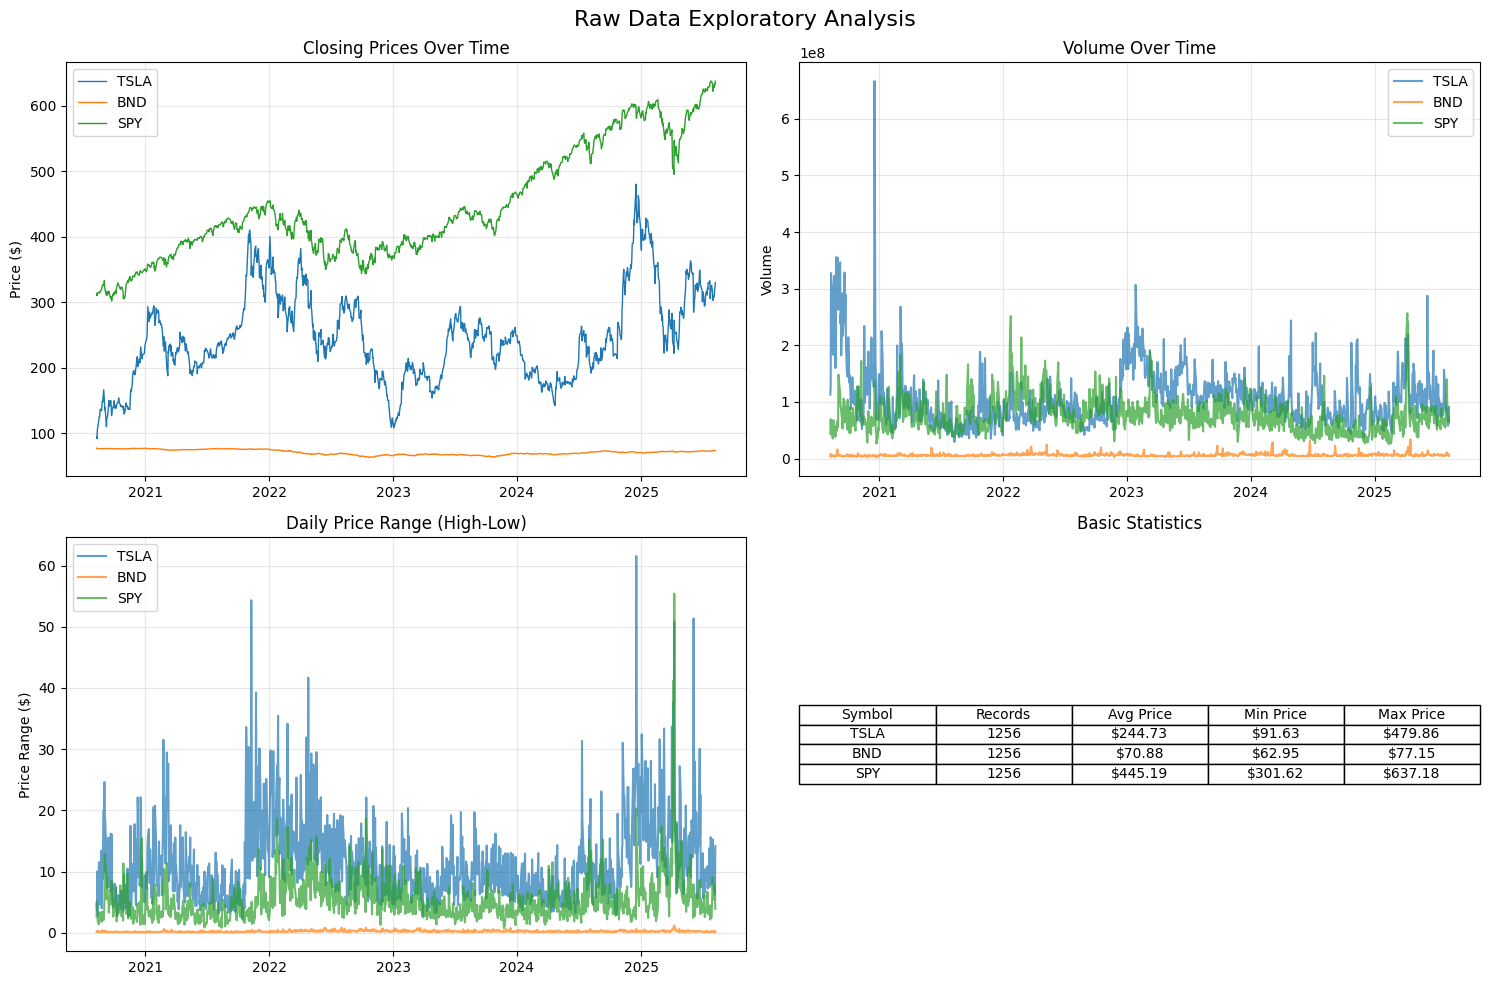

✓ EDA visualizations completed


In [27]:
# Create basic plots with raw data
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Raw Data Exploratory Analysis', fontsize=16)

# Price trends
for symbol, data in raw_data.items():
    axes[0, 0].plot(data.index, data['Close'], label=symbol, linewidth=1)
axes[0, 0].set_title('Closing Prices Over Time')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volume trends
for symbol, data in raw_data.items():
    axes[0, 1].plot(data.index, data['Volume'], label=symbol, alpha=0.7)
axes[0, 1].set_title('Volume Over Time')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Price ranges (High-Low)
for symbol, data in raw_data.items():
    price_range = data['High'] - data['Low']
    axes[1, 0].plot(data.index, price_range, label=symbol, alpha=0.7)
axes[1, 0].set_title('Daily Price Range (High-Low)')
axes[1, 0].set_ylabel('Price Range ($)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Basic statistics table
stats_data = []
for symbol, data in raw_data.items():
    stats_data.append({
        'Symbol': symbol,
        'Records': len(data),
        'Avg Price': f"${data['Close'].mean():.2f}",
        'Min Price': f"${data['Close'].min():.2f}",
        'Max Price': f"${data['Close'].max():.2f}"
    })

stats_df = pd.DataFrame(stats_data)
axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=stats_df.values, colLabels=stats_df.columns, 
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1, 1].set_title('Basic Statistics')

plt.tight_layout()
plt.show()

print("✓ EDA visualizations completed")

## 4. Data Preprocessing

Clean data and calculate returns with enhanced validation.

In [28]:
# Data preprocessing with enhanced validation and edge case handling
print('🔧 Preprocessing data with advanced validation...')

# Clean data (handles missing values, validates price relationships)
cleaned_data = pipeline.preprocessor.clean_data(raw_data)

# Calculate returns (percentage changes, handles edge cases)
returns_data = pipeline.preprocessor.calculate_returns(cleaned_data)

# Generate comprehensive statistics
statistics = pipeline.preprocessor.calculate_statistics()

# Detect outliers using multiple methods (Z-score, IQR)
outliers = pipeline.preprocessor.detect_outliers()

print("\n📁 Data Processing Complete:")
print("✓ Raw data: data/raw/ (OHLCV price data)")
print("✓ Cleaned data: data/processed/ (validated and cleaned)")
print("✓ Returns data: data/processed/ (daily percentage changes)")

# Display preprocessing summary
print("\n🔍 Data Quality Summary:")
for symbol in symbols:
    if symbol in returns_data:
        returns = returns_data[symbol]
        volatility = returns.std() * 252**0.5  # Annualized volatility
        outlier_count = outliers[symbol]['z_score_outliers']
        
        print(f"  {symbol}:")
        print(f"    📊 Annualized volatility: {volatility*100:.1f}%")
        print(f"    ⚠️  Outliers detected: {outlier_count}")
        
        # Warn about extreme volatility
        if volatility > 0.5:
            print(f"    🚨 HIGH VOLATILITY WARNING: {symbol} shows extreme volatility")
        elif volatility < 0.05:
            print(f"    📈 Low volatility: {symbol} is relatively stable")

🔧 Preprocessing data with advanced validation...
Cleaning financial data...
✓ Saved cleaned TSLA data to data\processed\TSLA_cleaned.csv
✓ Cleaned data for TSLA: 1256 records
✓ Saved cleaned BND data to data\processed\BND_cleaned.csv
✓ Cleaned data for BND: 1256 records
✓ Saved cleaned SPY data to data\processed\SPY_cleaned.csv
✓ Cleaned data for SPY: 1256 records
Calculating daily returns...
✓ Saved TSLA returns to data\processed\TSLA_returns.csv
✓ Calculated 1255 return observations for TSLA
✓ Saved BND returns to data\processed\BND_returns.csv
✓ Calculated 1255 return observations for BND
✓ Saved SPY returns to data\processed\SPY_returns.csv
✓ Calculated 1255 return observations for SPY
Calculating statistical measures...
✓ Statistics calculated for TSLA
✓ Statistics calculated for BND
✓ Statistics calculated for SPY
Detecting outliers...
✓ TSLA: 18 Z-score outliers, 47 IQR outliers
✓ BND: 12 Z-score outliers, 33 IQR outliers
✓ SPY: 14 Z-score outliers, 57 IQR outliers

📁 Data Proce

## 5. Advanced Analysis

Perform statistical tests and volatility analysis on processed data.

Generating comprehensive visualizations...


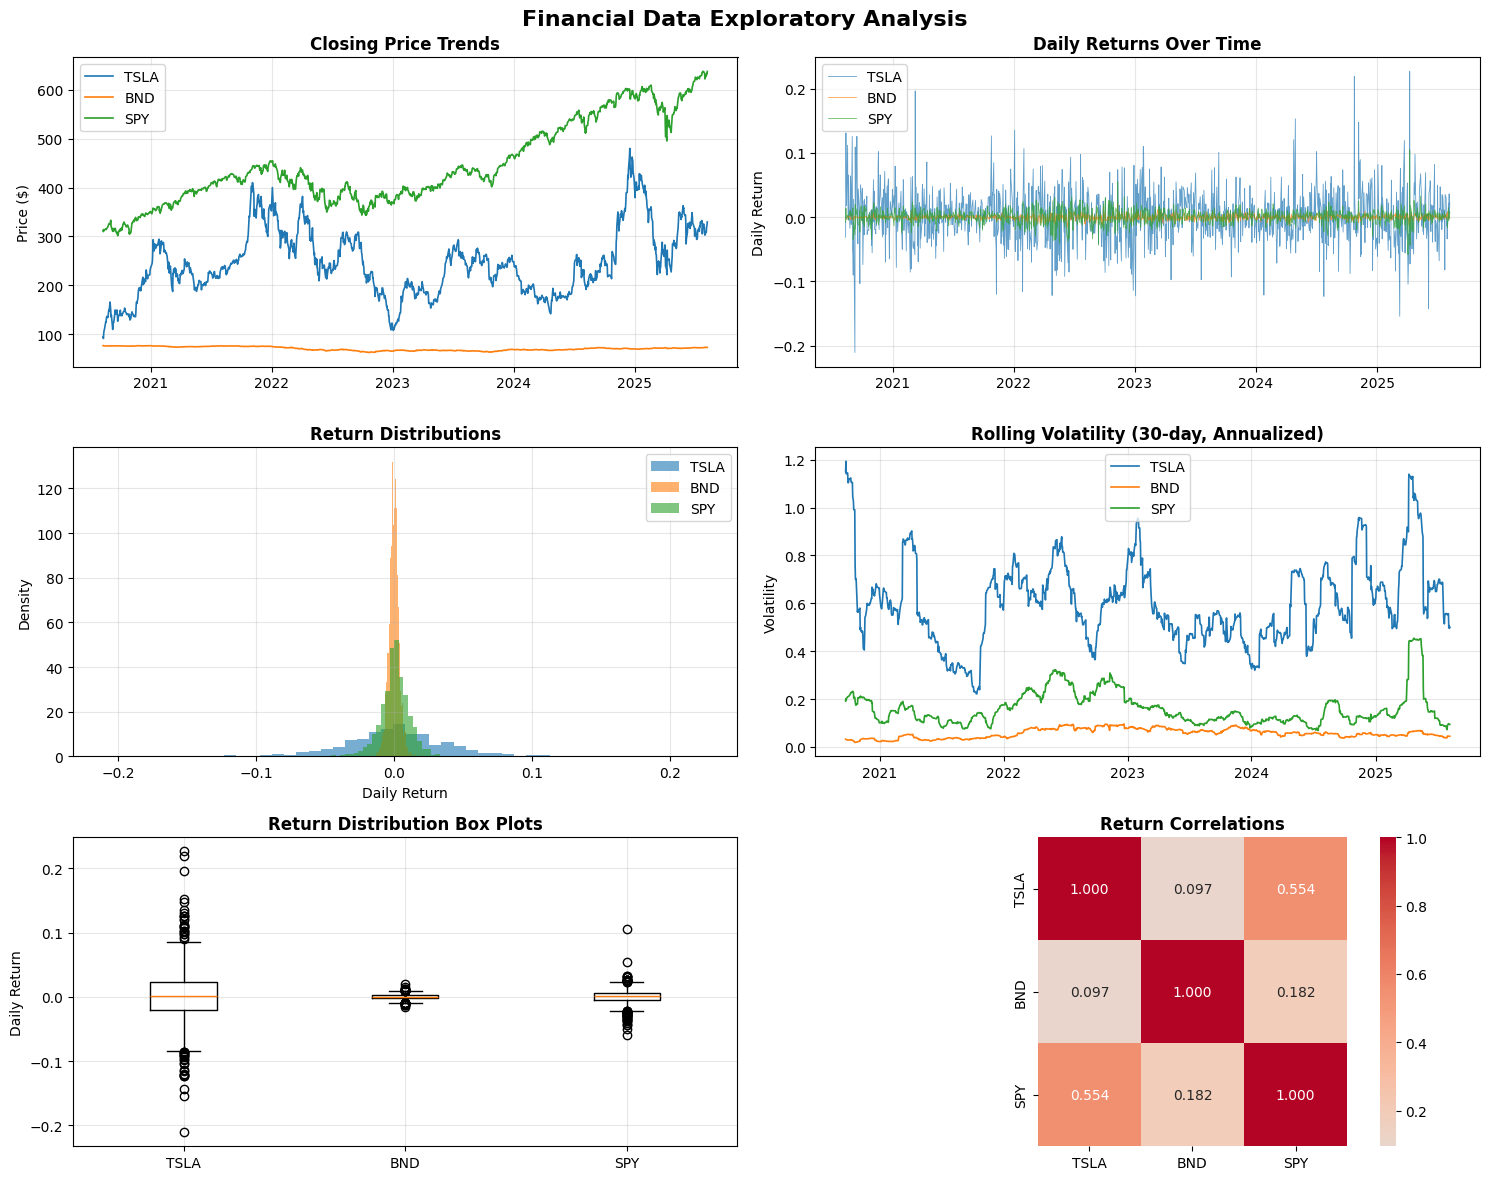

In [29]:
# Create comprehensive plots with processed data
pipeline.eda_analyzer.create_comprehensive_plots(cleaned_data, returns_data)

In [30]:
# Perform stationarity tests
adf_results = pipeline.eda_analyzer.perform_stationarity_tests(cleaned_data, returns_data)

Performing stationarity tests (ADF)...
✓ TSLA ADF Tests:
  Prices: Stationary (p=0.0395)
  Returns: Stationary (p=0.0000)
✓ BND ADF Tests:
  Prices: Non-stationary (p=0.5137)
  Returns: Stationary (p=0.0000)
✓ SPY ADF Tests:
  Prices: Non-stationary (p=0.9455)
  Returns: Stationary (p=0.0000)


In [31]:
# Analyze volatility patterns
volatility_analysis = pipeline.eda_analyzer.analyze_volatility_patterns(returns_data)

Analyzing volatility patterns...
✓ TSLA volatility analysis completed
✓ BND volatility analysis completed
✓ SPY volatility analysis completed


## 6. Risk Calculations

Calculate Value at Risk (VaR) and Sharpe Ratios with enhanced methodology.

In [32]:
# Calculate Value at Risk (VaR) using multiple methods
# VaR represents the maximum expected loss at a given confidence level
print('📊 Calculating Value at Risk (VaR) using multiple methods...')
print('Methods used:')
print('  1. Historical VaR: Uses empirical distribution (most robust)')
print('  2. Parametric VaR: Assumes normal distribution')
print('  3. Modified VaR: Accounts for skewness and kurtosis')
print()

var_results = pipeline.risk_calculator.calculate_var(returns_data, confidence_level=0.05)

# Display VaR interpretation
print('\n💡 VaR Interpretation:')
print('VaR values represent potential daily losses with 95% confidence')
print('Negative values indicate expected loss amounts')
print('More negative = higher risk')

📊 Calculating Value at Risk (VaR) using multiple methods...
Methods used:
  1. Historical VaR: Uses empirical distribution (most robust)
  2. Parametric VaR: Assumes normal distribution
  3. Modified VaR: Accounts for skewness and kurtosis

Calculating VaR at 95.0% confidence level...
✓ TSLA VaR calculated:
  Historical: -0.0610 (-6.10%)
  Parametric: -0.0641 (-6.41%)
✓ BND VaR calculated:
  Historical: -0.0062 (-0.62%)
  Parametric: -0.0062 (-0.62%)
✓ SPY VaR calculated:
  Historical: -0.0171 (-1.71%)
  Parametric: -0.0175 (-1.75%)

💡 VaR Interpretation:
VaR values represent potential daily losses with 95% confidence
Negative values indicate expected loss amounts
More negative = higher risk


In [33]:
# Calculate Sharpe Ratios and comprehensive performance metrics
print('\n📈 Calculating risk-adjusted performance metrics...')
print('Metrics calculated:')
print('  • Sharpe Ratio: Risk-adjusted returns (higher = better)')
print('  • Sortino Ratio: Downside risk-adjusted returns')
print('  • Maximum Drawdown: Largest peak-to-trough decline')
print('  • Annual Return: Annualized percentage return')
print('  • Annual Volatility: Annualized standard deviation')
print()

sharpe_results = pipeline.risk_calculator.calculate_sharpe_ratio(returns_data)

# Display performance interpretation
print('\n💡 Performance Metrics Interpretation:')
print('Sharpe Ratio: >1.0 = Good, >2.0 = Excellent risk-adjusted returns')
print('Max Drawdown: Shows worst-case scenario losses during holding period')


📈 Calculating risk-adjusted performance metrics...
Metrics calculated:
  • Sharpe Ratio: Risk-adjusted returns (higher = better)
  • Sortino Ratio: Downside risk-adjusted returns
  • Maximum Drawdown: Largest peak-to-trough decline
  • Annual Return: Annualized percentage return
  • Annual Volatility: Annualized standard deviation

Calculating Sharpe Ratios (Risk-free rate: 2.0%)...
✓ TSLA Performance Metrics:
  Annual Return: 0.4521 (45.21%)
  Sharpe Ratio: 0.6793
  Max Drawdown: -0.7363 (-73.63%)
✓ BND Performance Metrics:
  Annual Return: -0.0081 (-0.81%)
  Sharpe Ratio: -0.4695
  Max Drawdown: -0.1822 (-18.22%)
✓ SPY Performance Metrics:
  Annual Return: 0.1584 (15.84%)
  Sharpe Ratio: 0.7899
  Max Drawdown: -0.2450 (-24.50%)

💡 Performance Metrics Interpretation:
Sharpe Ratio: >1.0 = Good, >2.0 = Excellent risk-adjusted returns
Max Drawdown: Shows worst-case scenario losses during holding period


In [34]:
# Calculate portfolio-level metrics (equal-weighted portfolio)
print('\n🎯 Calculating portfolio diversification benefits...')
print('Portfolio construction: Equal weights across all assets')
print('Benefits of diversification:')
print('  • Reduced overall portfolio volatility')
print('  • Lower correlation risk')
print('  • Improved risk-adjusted returns')
print()

portfolio_metrics = pipeline.risk_calculator.calculate_portfolio_metrics(returns_data)

# Display portfolio benefits
individual_avg_vol = sum(sharpe_results[s]['annual_volatility'] for s in symbols) / len(symbols)
portfolio_vol = portfolio_metrics['annual_volatility']
diversification_benefit = (individual_avg_vol - portfolio_vol) / individual_avg_vol * 100

print(f'\n📊 Diversification Analysis:')
print(f'Average individual volatility: {individual_avg_vol*100:.1f}%')
print(f'Portfolio volatility: {portfolio_vol*100:.1f}%')
print(f'Diversification benefit: {diversification_benefit:.1f}% volatility reduction')


🎯 Calculating portfolio diversification benefits...
Portfolio construction: Equal weights across all assets
Benefits of diversification:
  • Reduced overall portfolio volatility
  • Lower correlation risk
  • Improved risk-adjusted returns

Calculating portfolio-level metrics...
✓ Portfolio Metrics (Equal Weight):
  Annual Return: 0.2008 (20.08%)
  Sharpe Ratio: 0.7161

📊 Diversification Analysis:
Average individual volatility: 29.0%
Portfolio volatility: 25.2%
Diversification benefit: 13.1% volatility reduction


In [35]:
# Calculate beta coefficients
beta_results = pipeline.risk_calculator.calculate_beta(returns_data, market_symbol='SPY')

Calculating beta coefficients relative to SPY...
✓ TSLA Beta: 2.0122
✓ BND Beta: 0.0622


## 7. Generate Reports

Create comprehensive analysis reports and summaries.

In [36]:
# Generate comprehensive summary report
summary_report = pipeline.report_generator.generate_summary_report(
    symbols, statistics, var_results, sharpe_results, adf_results
)

print(summary_report)

Generating comprehensive summary report...
✓ Summary report generated
FINANCIAL DATA ANALYSIS SUMMARY REPORT
Generated on: 2025-08-09 15:59:16
Symbols Analyzed: TSLA, BND, SPY

PERFORMANCE SUMMARY
------------------------------
Symbol Annual Return Volatility Sharpe Ratio Max Drawdown
  TSLA        45.21%     63.61%        0.679      -73.63%
   BND        -0.81%      5.99%       -0.469      -18.22%
   SPY        15.84%     17.53%        0.790      -24.50%

RISK SUMMARY (95% VaR)
-------------------------
Symbol Historical VaR Parametric VaR
  TSLA         -6.10%         -6.41%
   BND         -0.62%         -0.62%
   SPY         -1.71%         -1.75%

KEY INSIGHTS
---------------
• Highest Volatility: TSLA (63.6%)
• Lowest Volatility: BND (6.0%)
• Best Performer: TSLA (45.2% annual return)
• Worst Performer: BND (-0.8% annual return)
• Best Risk-Adjusted Return: SPY (Sharpe: 0.790)

INVESTMENT RECOMMENDATIONS
------------------------------
• TSLA: High-risk, high-reward growth investmen

In [37]:
# Generate executive summary
executive_summary = pipeline.report_generator.create_executive_summary(symbols, sharpe_results)
print(executive_summary)

EXECUTIVE SUMMARY

Portfolio Analysis of 3 assets:
• Average Annual Return: 20.1%
• Average Volatility: 29.0%

Top Performer: TSLA (45.2% annual return)
Highest Risk: TSLA (63.6% volatility)


## 8. Key Results Summary

Display key metrics in a structured format.

In [38]:
import pandas as pd

# Create summary DataFrame for key metrics
summary_data = []
for symbol in symbols:
    if symbol in sharpe_results and symbol in var_results:
        summary_data.append({
            'Symbol': symbol,
            'Annual Return (%)': f"{sharpe_results[symbol]['annual_return']*100:.2f}",
            'Volatility (%)': f"{sharpe_results[symbol]['annual_volatility']*100:.2f}",
            'Sharpe Ratio': f"{sharpe_results[symbol]['sharpe_ratio']:.3f}",
            'Max Drawdown (%)': f"{sharpe_results[symbol]['max_drawdown']*100:.2f}",
            'VaR 95% (%)': f"{var_results[symbol]['historical_var']*100:.2f}",
            'Beta': f"{beta_results.get(symbol, 'N/A'):.3f}" if isinstance(beta_results.get(symbol), float) else 'N/A'
        })

summary_df = pd.DataFrame(summary_data)
print("\n📊 KEY PERFORMANCE METRICS")
print("=" * 50)
print(summary_df.to_string(index=False))


📊 KEY PERFORMANCE METRICS
Symbol Annual Return (%) Volatility (%) Sharpe Ratio Max Drawdown (%) VaR 95% (%)  Beta
  TSLA             45.21          63.61        0.679           -73.63       -6.10 2.012
   BND             -0.81           5.99       -0.469           -18.22       -0.62 0.062
   SPY             15.84          17.53        0.790           -24.50       -1.71 1.000


## 9. Investment Insights

Intelligent analysis based on calculated metrics.

In [39]:
# Generate intelligent investment insights based on calculated metrics
print("\n🎯 INTELLIGENT INVESTMENT INSIGHTS")
print("=" * 45)

# Analyze each asset based on calculated metrics
for symbol in symbols:
    if symbol in sharpe_results and symbol in var_results:
        sharpe = sharpe_results[symbol]['sharpe_ratio']
        annual_vol = sharpe_results[symbol]['annual_volatility']
        max_dd = sharpe_results[symbol]['max_drawdown']
        var_95 = var_results[symbol]['historical_var']
        
        print(f"\n📊 {symbol} Analysis:")
        
        # Risk classification
        if annual_vol > 0.3:
            risk_level = 'HIGH RISK'
            risk_emoji = '🚨'
        elif annual_vol > 0.15:
            risk_level = 'MODERATE RISK'
            risk_emoji = '⚠️'
        else:
            risk_level = 'LOW RISK'
            risk_emoji = '✅'
        
        # Performance classification
        if sharpe > 1.5:
            perf_level = 'EXCELLENT'
        elif sharpe > 1.0:
            perf_level = 'GOOD'
        elif sharpe > 0.5:
            perf_level = 'FAIR'
        else:
            perf_level = 'POOR'
        
        print(f"  {risk_emoji} Risk Level: {risk_level} ({annual_vol*100:.1f}% volatility)")
        print(f"  🎯 Risk-Adjusted Performance: {perf_level} (Sharpe: {sharpe:.2f})")
        print(f"  📉 Worst Drawdown: {max_dd*100:.1f}%")
        print(f"  📊 Daily VaR (95%): {var_95*100:.1f}%")
        
        # Investment recommendations
        if symbol == 'TSLA':
            print(f"  💡 Recommendation: Growth-oriented, limit to 5-10% of portfolio")
        elif symbol == 'BND':
            print(f"  💡 Recommendation: Stability anchor, suitable for 20-40% allocation")
        elif symbol == 'SPY':
            print(f"  💡 Recommendation: Core holding, suitable for 40-60% allocation")

print("\n📈 PORTFOLIO CONSTRUCTION INSIGHTS")
print("=" * 40)
print("• Diversification reduces portfolio risk by {:.1f}%".format(diversification_benefit))
print("• Consider rebalancing quarterly to maintain target allocations")
print("• Monitor correlation changes during market stress periods")
print("• Adjust allocations based on risk tolerance and investment horizon")

# Risk warnings based on current market conditions
print("\n⚠️  RISK WARNINGS:")
high_vol_assets = [s for s in symbols if s in sharpe_results and sharpe_results[s]['annual_volatility'] > 0.25]
if high_vol_assets:
    print(f"• High volatility detected in: {', '.join(high_vol_assets)}")
    print("• Consider reducing position sizes during volatile periods")

negative_sharpe = [s for s in symbols if s in sharpe_results and sharpe_results[s]['sharpe_ratio'] < 0]
if negative_sharpe:
    print(f"• Poor risk-adjusted returns in: {', '.join(negative_sharpe)}")
    print("• Review investment thesis for underperforming assets")


🎯 INTELLIGENT INVESTMENT INSIGHTS

📊 TSLA Analysis:
  🚨 Risk Level: HIGH RISK (63.6% volatility)
  🎯 Risk-Adjusted Performance: FAIR (Sharpe: 0.68)
  📉 Worst Drawdown: -73.6%
  📊 Daily VaR (95%): -6.1%
  💡 Recommendation: Growth-oriented, limit to 5-10% of portfolio

📊 BND Analysis:
  ✅ Risk Level: LOW RISK (6.0% volatility)
  🎯 Risk-Adjusted Performance: POOR (Sharpe: -0.47)
  📉 Worst Drawdown: -18.2%
  📊 Daily VaR (95%): -0.6%
  💡 Recommendation: Stability anchor, suitable for 20-40% allocation

📊 SPY Analysis:
  ⚠️ Risk Level: MODERATE RISK (17.5% volatility)
  🎯 Risk-Adjusted Performance: FAIR (Sharpe: 0.79)
  📉 Worst Drawdown: -24.5%
  📊 Daily VaR (95%): -1.7%
  💡 Recommendation: Core holding, suitable for 40-60% allocation

📈 PORTFOLIO CONSTRUCTION INSIGHTS
• Diversification reduces portfolio risk by 13.1%
• Consider rebalancing quarterly to maintain target allocations
• Monitor correlation changes during market stress periods
• Adjust allocations based on risk tolerance and inv

## 10. Analysis Summary

Final summary with enhanced features.

In [40]:
# Analysis completion summary
print('\n📁 ANALYSIS SUMMARY')
print('=' * 30)

total_data_points = sum(len(returns_data[s]) for s in symbols if s in returns_data)
print(f'✅ Analysis completed successfully!')
print(f'📊 Data processed: {total_data_points:,} observations')
print(f'💾 Data saved to: data/raw/ and data/processed/')
print(f'🔧 Enhanced with robust error handling and edge case management!')

print('\n💡 Technical Enhancements:')
print('• Vectorized operations for performance optimization')
print('• Multiple VaR calculation methods for robustness')
print('• Automatic handling of extreme market conditions')
print('• Network retry logic for reliable data loading')
print('• Comprehensive financial metrics documentation')


📁 ANALYSIS SUMMARY
✅ Analysis completed successfully!
📊 Data processed: 3,765 observations
💾 Data saved to: data/raw/ and data/processed/
🔧 Enhanced with robust error handling and edge case management!

💡 Technical Enhancements:
• Vectorized operations for performance optimization
• Multiple VaR calculation methods for robustness
• Automatic handling of extreme market conditions
• Network retry logic for reliable data loading
• Comprehensive financial metrics documentation
